#2η ομαδική άσκηση στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

***Χαρίτου Δανάη-Νικολέτα (03116045)*** \

***Γαλάνης Δημήτριος (03116088)*** \

***Ομάδα F01***


## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility
from keras.utils import np_utils

import tensorflow_datasets as tfds
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
gdrive_filename = 'gdrive/My Drive/ask/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 1

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
# select the number of classes
num_classes = 20
cifar100_classes_url = select_classes_number(num_classes)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' beaver', ' bridge', ' caterpillar', ' cup', ' leopard', ' lizard', ' lobster', ' motorcycle', ' mouse', ' otter', ' pine_tree', ' porcupine', ' possum', ' rabbit', ' skunk', ' table', ' telephone', ' tractor', ' turtle', ' wolf']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


data_size =  10000 img_rows =  32 img_channels =  3
Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


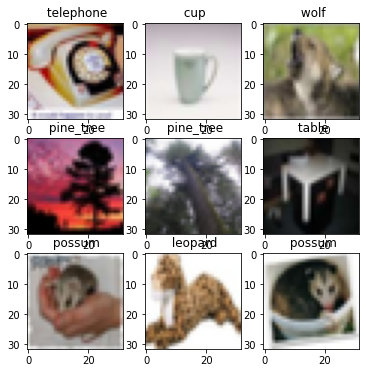

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape
print("data_size = ", data_size, "img_rows = ", img_rows, "img_channels = ", img_channels)
# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
"""
The classification problem we try to solve has num_classes classes and therefore is a subproblem of cifar100.
Therefore we have to map our classes [0, num_classes-1]
"""
def mapping(arr):
  i=0
  dictionary = {}
  for label in arr:
    if label not in dictionary.keys():
      dictionary[label] = i
      i+=1
  return dictionary

def apply_mapping(arr,d): 
  return [d[x] for x in arr]

In [ ]:
# get mapping 
label_dict = mapping(y_train.reshape(1,-1)[0])
# apply mapping
y_train = apply_mapping(y_train.reshape(1,-1)[0], label_dict)
y_test = apply_mapping(y_test.reshape(1,-1)[0], label_dict)
y_val = apply_mapping(y_val.reshape(1,-1)[0], label_dict)

In [ ]:
y_train = np.array([[i] for i in y_train])
y_test = np.array([[i] for i in y_test])
y_val = np.array([[i] for i in y_val])

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούνα να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε τα σχετικά λήμματα [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


###***Aπάντηση***:
Αξιοποιώντας την εντολή load της βιβλιοθήκης tensorflow_datasets, αποθηκεύουμε 
το σύνολο δεδομένων σε αρχεία tfrecords στο δίσκο. Με αυτό τον τρόπο μπορούμε να ανασύρουμε δυναμικά το dataset κατά την διάρκεια εκπάιδευσης του μοντέλου, επιλύοντας το πρόβλημα διαχείρισης της μνήμης. Ωστόσο απαταιτείται κάποιας μορφής επεξεργασία για την δημιουργία του μοναδικού dataset που αντιστοιχεί στην ομάδα μας, κατά αναλογία με την διαδικασία που εκετέλεστηκε προηγουμένως. 

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('cifar100', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)
assert isinstance(ds_train, tf.data.Dataset)
assert isinstance(ds_test, tf.data.Dataset)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.0.incompleteH20EHH/cifar100-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.0.incompleteH20EHH/cifar100-test.tfrecord


Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.0. Subsequent calls will reuse this data.


Εναλλακτικά, τρέχουμε τον παρακάτω κώδικα για το serialization των train, test, val δεδομένων. Τα σειριοποιημένα δεδομένα, αποθηκεύονται σε φάκελο του GoogleDrive (και επομένως χρειάζεται να έχει πραγματοποιηθεί το authorization μέσω του κώδικα που δόθηκε στην αρχή αυτού του notebook). Για να τρέξει τοπικά θα πρέπει τα ο φάκελος στον οποίο γράφονται (gdrive_filename) να υπάρχει στο mounted Google Drive filesystem.

In [ ]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_example(feature0, feature1):
  """
  Creates a tf.Example message ready to be written to a file.
  """
  # Create a dictionary mapping the feature name to the tf.Example-compatible
  # data type.
  feature = {
      'image_raw': _bytes_feature(feature0.tostring()),
      'label': _int64_feature(feature1),
  }

  # Create a Features message using tf.train.Example.

  example = tf.train.Example(features=tf.train.Features(feature=feature))
  return example.SerializeToString()


def write_tfrecord (dataset,labels,set_label):
  with tf.io.TFRecordWriter(gdrive_filename+set_label) as writer:
    for i in range(dataset.shape[0]):
      example = serialize_example(dataset[i], labels[i])
      writer.write(example)
  writer.close()

In [ ]:
write_tfrecord(x_train, y_train, 'train')
write_tfrecord(x_test, y_test, 'test')
write_tfrecord(x_val, y_val, 'val')

Έπειτα, διαβάζουμε τα εν λόγω σύνολα δεδομένων από τα αντίστοιχα tfrecords αρχεία. 

In [ ]:
image_features = {
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_image_function(example):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example, image_features)

def read_tfrecord (set_label):
  final_set = []
  final_labels = []
  dataset = tf.data.TFRecordDataset(gdrive_filename+set_label)
  parsed_dataset = dataset.map(_parse_image_function, num_parallel_calls=4)
  for item in parsed_dataset:
    image_raw = item['image_raw'].numpy()
    image = np.frombuffer(image_raw).reshape((32,32,3))
    final_set.append(image)
    label = item['label'].numpy()
    final_labels.append(label)
  return np.array(final_set), np.array(final_labels).reshape((len(final_labels),1))

In [ ]:
x_train_tfrecord, y_train_tfrecord = read_tfrecord('train')
x_test_tfrecord, y_test_tfrecord = read_tfrecord('test')
x_val_tfrecord, y_val_tfrecord = read_tfrecord('val')

In [ ]:
print(x_train.shape)
print(x_train_tfrecord.shape)
print(y_train.shape)
print(y_train_tfrecord.shape)
print(x_test.shape)
print(x_test_tfrecord.shape)
print(y_test.shape)
print(y_test_tfrecord.shape)
print(x_val.shape)
print(x_val_tfrecord.shape)
print(y_val.shape)
print(y_val_tfrecord.shape)

(17000, 32, 32, 3)
(17000, 32, 32, 3)
(17000, 1)
(17000, 1)
(4000, 32, 32, 3)
(4000, 32, 32, 3)
(4000, 1)
(4000, 1)
(3000, 32, 32, 3)
(3000, 32, 32, 3)
(3000, 1)
(3000, 1)


#Ερώτημα 1
**Βήμα 1:** Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων \

**1.1.** Σχεδίασετε αρχικά τα ακόλουθα μοντέλα:

Softmax (baseline): FC(200), SOFTMAX

MLP: FC(512), RELU, FC(200), SOFTMAX

LeNet: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

CNN1: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

CNN2: σχεδίαστε την αρχιτεκτονική του και δικού σας μοντέλου



In [ ]:
model_softbase1 = models.Sequential()
model_softbase1.add(layers.Flatten(input_shape=(32,32,3)))
model_softbase1.add(layers.Dense(200))
model_softbase1.add(layers.Dense(num_classes, activation='softmax'))
model_softbase1.summary()
model_softbase2 = tf.keras.models.clone_model(model_softbase1)


model_mlp1 = models.Sequential()
model_mlp1.add(layers.Flatten(input_shape=(32,32,3)))
model_mlp1.add(layers.Dense(512, activation='relu'))
model_mlp1.add(layers.Dense(200))
model_mlp1.add(layers.Dense(num_classes, activation='softmax'))
model_mlp1.summary()
model_mlp2= tf.keras.models.clone_model(model_mlp1)

model_lenet1 = models.Sequential()
model_lenet1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_lenet1.add(layers.MaxPooling2D((3, 3)))
model_lenet1.add(layers.Conv2D(32,(3,3), activation='relu' ))
model_lenet1.add(layers.MaxPooling2D((2, 2)))
model_lenet1.add(layers.Flatten())
model_lenet1.add(layers.Dense(512, activation='relu'))
model_lenet1.add(layers.Dense(200))
model_lenet1.add(layers.Dense(num_classes, activation='softmax'))
model_lenet1.summary()
model_lenet2 = tf.keras.models.clone_model(model_lenet1)


model_cnn11 = models.Sequential()
model_cnn11.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_cnn11.add(layers.MaxPooling2D((2, 2)))
model_cnn11.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_cnn11.add(layers.MaxPooling2D((2, 2)))
model_cnn11.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn11.add(layers.Flatten())
model_cnn11.add(layers.Dense(200))
model_cnn11.add(layers.Dense(num_classes, activation='softmax'))
model_cnn11.summary()
model_cnn12 = tf.keras.models.clone_model(model_cnn11)


model_cnn21 = models.Sequential()
model_cnn21.add(layers.Conv2D(128, (3,3), padding="same",input_shape=(32, 32, 3)))
model_cnn21.add(tf.keras.layers.LeakyReLU())
model_cnn21.add(layers.Conv2D(128, (3, 3), padding='same'))
model_cnn21.add(layers.MaxPooling2D((2, 2)))
model_cnn21.add(tf.keras.layers.LeakyReLU())
model_cnn21.add(layers.Conv2D(256, (3, 3), padding='same'))
model_cnn21.add(tf.keras.layers.LeakyReLU())
model_cnn21.add(layers.MaxPooling2D((2, 2)))
model_cnn21.add(layers.Conv2D(512, (3, 3), padding='same'))
model_cnn21.add(tf.keras.layers.LeakyReLU())
model_cnn21.add(layers.Conv2D(256, (3, 3)))
model_cnn21.add(tf.keras.layers.LeakyReLU())
model_cnn21.add(layers.MaxPooling2D((2, 2)))
model_cnn21.add(layers.Flatten())
model_cnn21.add(layers.Dense(1024))
model_cnn21.add(tf.keras.layers.LeakyReLU())
model_cnn21.add(layers.Dense(200))
model_cnn21.add(layers.Dense(num_classes, activation='softmax'))
model_cnn21.summary()
model_cnn22 = tf.keras.models.clone_model(model_cnn21)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_42 (Dense)             (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               1573376   
________________________

- Όσον αφορά την αρχιτεκτονική του δικού μας μοντέλου, επιλέξαμε να αποτελείται από μια ισχυρή συνεκτική βάση, δηλαδή ένα πλήθος από convolutional layers με σταδιακά μειούμενο μέγεθος, μεταξύ των οποίων παρεμβάλλονται τα κατάλληλα max-pooling layers αλλά και μη γραμμικές συναρτήσεις ενεργοποίησης με την μορφή της Leaky ReLU. Η κεφαλή ταξινόμησης σχεδιάστηκε με απλό τρόπο, εφόσον με αυτή την υλοποίηση επιτυγχάνονται ικανοποιητικά αποτελέσματα και συγχρόνως δεν επιβαρύνεται υπολογιστικά το νευρωνικό δίκτυο. 

- Όσον αφορά τις δοθείσες αρχιτεκτονικές μοντέλων, προσθέσαμε στο τελικό στάδιο ένα fully connected layer με συνάρτηση εναργοποίησης την softmax, το οποίο πραγματοποιεί στην ουσία την ταξινόμηση στο ζητούμενο αριθμό κλάσεων. Οι δυνατές επιλογές ως προς την παράμετρο αυτή στα πλαίσια της παρούσης άσκησης είναι 20, 40, 60 ή 80. Ωστόσο, θεωρώντας την χρήση του accuracy ως μετρική αξιολόγησης, οι εν λόγω κλάσεις κωδικοποιούνται με αριθμούς από το 1 έως το 100, οπότε με βάση την παρατήρηση αυτή επιλέγεται το πλήθος νευρώνων στο αντίστοιχο επίπεδο. Για την υλοποίηση αυτής της κωδικοποίησης τα indices των num_classes κλάσεων του train set γίνονται map στο διάστημα [0, num_classes-1].

**1.2.** Μεταγλωτίστε και εκπαιδεύστε, έπειτα, όλα τα μοντέλα σας, χρησιμοποιώντας 2 διαφορετικούς (καλύτερους) συνδυασμούς optimizer, loss, metrics και epoch (θα προκύψουν 10 διαφορετικά εκπαιδευμένα μοντέλα, 2 ανά αρχιτεκτονική).

###***Aπάντηση***:

H επιλογή των αναγραφόμενων παραμέτρων εκπαίδευσης (otpimizer, loss, metrics) που χρησιμοποιούνται στα εξεταζόμενα μοντέλα, πραγαματοποιήθηκε ύστερα από σχετικό πειραματισμό. Ειδικότερα, όσον αφορά την μετρική αξιολόγησης, παρατηρήσαμε ότι η συμπεριφορά της εξαρτάται από την επίδοση του εκάστοτε μοντέλου με μόνη διαφοροποίηση ανάμεσα στις διάφορες επιλογές στην χρησιμοποιούμενη κλίμακα ή την ποσοτική της έκφραση. Για τον λόγο αυτό επιλέξαμε να χρησιμοποιήσουμε σε όλες τις εκδοχές των μοντέλων την μετρική της ακρίβειας, η οποία αποτελεί ένα εύληπτο μέτρο της απόδοσης και συγχρόνως καθιστά εφικτή την σύγκριση μεταξύ διαφορετικών μοντέλων.

In [ ]:
model_softbase1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_softbase1 = model_softbase1.fit(x_train, y_train, epochs=24, 
                    validation_data=(x_val, y_val))

model_softbase1.save('softbase1.h5')



model_softbase2.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_softbase2 = model_softbase2.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_val, y_val))

model_softbase2.save('softbase2.h5')

Epoch 1/24
266/266 [==============================] - 1s 3ms/step - loss: 3.5139 - accuracy: 0.1687 - val_loss: 3.2343 - val_accuracy: 0.1747
Epoch 2/24
266/266 [==============================] - 1s 3ms/step - loss: 2.9288 - accuracy: 0.2279 - val_loss: 2.7639 - val_accuracy: 0.2073
Epoch 3/24
266/266 [==============================] - 1s 3ms/step - loss: 2.6162 - accuracy: 0.2576 - val_loss: 2.6982 - val_accuracy: 0.2420
Epoch 4/24
266/266 [==============================] - 1s 3ms/step - loss: 2.4852 - accuracy: 0.2865 - val_loss: 2.6167 - val_accuracy: 0.2453
Epoch 5/24
266/266 [==============================] - 1s 3ms/step - loss: 2.4179 - accuracy: 0.2922 - val_loss: 2.5696 - val_accuracy: 0.2600
Epoch 6/24
266/266 [==============================] - 1s 3ms/step - loss: 2.3994 - accuracy: 0.2995 - val_loss: 2.5291 - val_accuracy: 0.2760
Epoch 7/24
266/266 [==============================] - 1s 3ms/step - loss: 2.3866 - accuracy: 0.3019 - val_loss: 2.5124 - val_accuracy: 0.2680
Epoch 

In [ ]:
model_mlp1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


history_mlp1 = model_mlp1.fit(x_train, y_train, epochs=48, 
                    validation_data=(x_val, y_val))

model_mlp1.save('mlp1.h5')


model_mlp2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_mlp2 = model_mlp2.fit(x_train, y_train, epochs=57, 
                    validation_data=(x_val, y_val))

model_mlp2.save('mlp2.h5')

Epoch 1/48
266/266 [==============================] - 1s 3ms/step - loss: 2.8301 - accuracy: 0.1615 - val_loss: 2.6368 - val_accuracy: 0.2053
Epoch 2/48
266/266 [==============================] - 1s 3ms/step - loss: 2.5544 - accuracy: 0.2325 - val_loss: 2.4885 - val_accuracy: 0.2513
Epoch 3/48
266/266 [==============================] - 1s 3ms/step - loss: 2.4704 - accuracy: 0.2571 - val_loss: 2.4534 - val_accuracy: 0.2867
Epoch 4/48
266/266 [==============================] - 1s 3ms/step - loss: 2.4117 - accuracy: 0.2740 - val_loss: 2.4655 - val_accuracy: 0.2673
Epoch 5/48
266/266 [==============================] - 1s 3ms/step - loss: 2.3716 - accuracy: 0.2899 - val_loss: 2.4172 - val_accuracy: 0.2933
Epoch 6/48
266/266 [==============================] - 1s 3ms/step - loss: 2.3536 - accuracy: 0.2896 - val_loss: 2.4679 - val_accuracy: 0.2727
Epoch 7/48
266/266 [==============================] - 1s 3ms/step - loss: 2.3244 - accuracy: 0.3025 - val_loss: 2.4261 - val_accuracy: 0.2793
Epoch 

In [ ]:
model_lenet1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


history_lenet1 = model_lenet1.fit(x_train, y_train, epochs=11, 
                    validation_data=(x_val, y_val))

model_lenet1.save('lenet1.h5')



model_lenet2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_lenet2 = model_lenet2.fit(x_train, y_train, epochs=58, 
                    validation_data=(x_val, y_val))

model_lenet2.save('lenet2.h5')

Epoch 1/11
266/266 [==============================] - 1s 5ms/step - loss: 2.4773 - accuracy: 0.2569 - val_loss: 2.2091 - val_accuracy: 0.3440
Epoch 2/11
266/266 [==============================] - 1s 4ms/step - loss: 2.0342 - accuracy: 0.3828 - val_loss: 2.0346 - val_accuracy: 0.3927
Epoch 3/11
266/266 [==============================] - 1s 4ms/step - loss: 1.8137 - accuracy: 0.4431 - val_loss: 1.9230 - val_accuracy: 0.4213
Epoch 4/11
266/266 [==============================] - 1s 4ms/step - loss: 1.6428 - accuracy: 0.4949 - val_loss: 1.8137 - val_accuracy: 0.4573
Epoch 5/11
266/266 [==============================] - 1s 4ms/step - loss: 1.4669 - accuracy: 0.5452 - val_loss: 1.8873 - val_accuracy: 0.4547
Epoch 6/11
266/266 [==============================] - 1s 3ms/step - loss: 1.2929 - accuracy: 0.5979 - val_loss: 1.8740 - val_accuracy: 0.4673
Epoch 7/11
266/266 [==============================] - 1s 3ms/step - loss: 1.1256 - accuracy: 0.6434 - val_loss: 1.8579 - val_accuracy: 0.4840
Epoch 

In [ ]:
model_cnn11.compile(optimizer='adamax',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


history_cnn11 = model_cnn11.fit(x_train, y_train, epochs=57, 
                    validation_data=(x_val, y_val))

model_cnn11.save('cnn11.h5')



model_cnn12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn12 = model_cnn12.fit(x_train, y_train, epochs=58, 
                    validation_data=(x_val, y_val))

model_cnn12.save('cnn12.h5')


Epoch 1/57
266/266 [==============================] - 1s 4ms/step - loss: 2.7355 - accuracy: 0.1738 - val_loss: 2.5706 - val_accuracy: 0.2440
Epoch 2/57
266/266 [==============================] - 1s 3ms/step - loss: 2.4484 - accuracy: 0.2631 - val_loss: 2.4102 - val_accuracy: 0.2947
Epoch 3/57
266/266 [==============================] - 1s 3ms/step - loss: 2.3006 - accuracy: 0.3138 - val_loss: 2.3310 - val_accuracy: 0.3100
Epoch 4/57
266/266 [==============================] - 1s 4ms/step - loss: 2.1984 - accuracy: 0.3488 - val_loss: 2.2385 - val_accuracy: 0.3340
Epoch 5/57
266/266 [==============================] - 1s 4ms/step - loss: 2.1119 - accuracy: 0.3731 - val_loss: 2.2035 - val_accuracy: 0.3580
Epoch 6/57
266/266 [==============================] - 1s 4ms/step - loss: 2.0637 - accuracy: 0.3882 - val_loss: 2.1325 - val_accuracy: 0.3700
Epoch 7/57
266/266 [==============================] - 1s 4ms/step - loss: 1.9988 - accuracy: 0.4035 - val_loss: 2.1093 - val_accuracy: 0.3733
Epoch 

In [ ]:
model_cnn21.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


history_cnn21 = model_cnn21.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

model_cnn21.save('cnn21.h5')


model_cnn22.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn22 = model_cnn22.fit(x_train, y_train, epochs=37, 
                    validation_data=(x_val, y_val))

model_cnn22.save('cnn22.h5')


Epoch 1/10
266/266 [==============================] - 5s 19ms/step - loss: 2.7571 - accuracy: 0.1638 - val_loss: 2.5075 - val_accuracy: 0.2490
Epoch 2/10
266/266 [==============================] - 4s 17ms/step - loss: 2.3067 - accuracy: 0.3069 - val_loss: 2.1742 - val_accuracy: 0.3305
Epoch 3/10
266/266 [==============================] - 4s 17ms/step - loss: 2.0391 - accuracy: 0.3873 - val_loss: 1.9613 - val_accuracy: 0.4165
Epoch 4/10
266/266 [==============================] - 4s 17ms/step - loss: 1.7504 - accuracy: 0.4682 - val_loss: 1.7346 - val_accuracy: 0.4810
Epoch 5/10
266/266 [==============================] - 5s 17ms/step - loss: 1.5115 - accuracy: 0.5367 - val_loss: 1.7116 - val_accuracy: 0.4760
Epoch 6/10
266/266 [==============================] - 5s 17ms/step - loss: 1.3798 - accuracy: 0.5754 - val_loss: 1.8198 - val_accuracy: 0.4760
Epoch 7/10
266/266 [==============================] - 5s 17ms/step - loss: 1.1050 - accuracy: 0.6632 - val_loss: 1.8477 - val_accuracy: 0.5220


#### Βήμα 2: Αξιολόγηση των μοντέλων

**2.1**. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1.2 (10 διαγράμματα) και επιλέξτε αυτό με την καλύτερη ακρίβεια από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 5).  



In [ ]:
def acc_vs_valacc(history, title=''):
  fig = plt.figure()
  plt.title(title)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

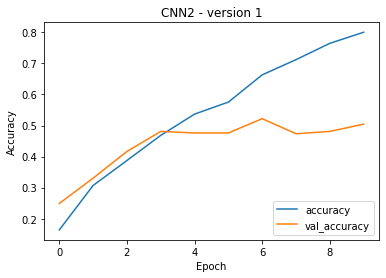

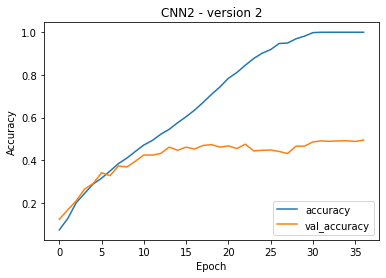

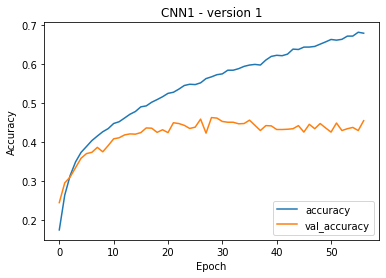

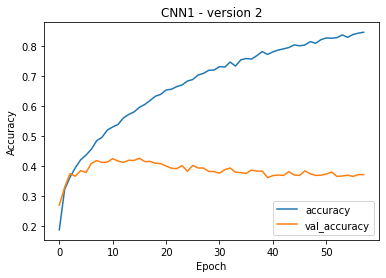

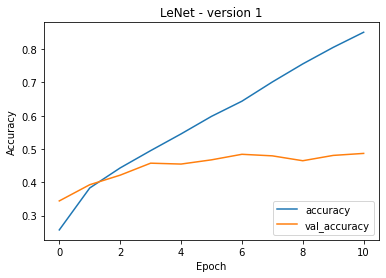

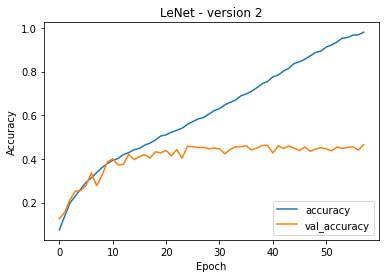

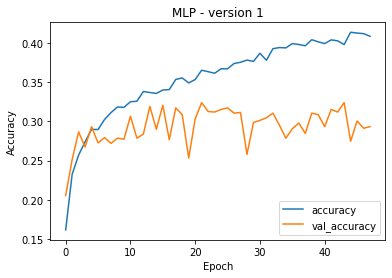

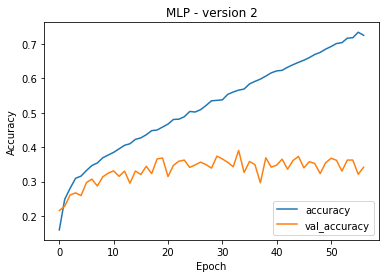

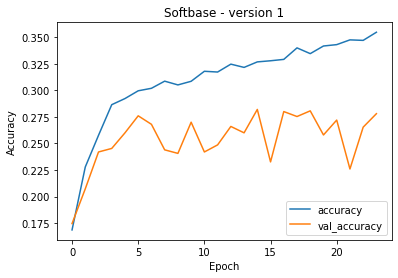

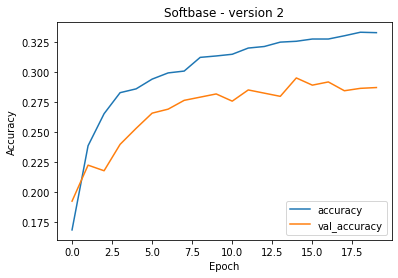

In [ ]:
acc_vs_valacc(history_cnn21, 'CNN2 - version 1')
acc_vs_valacc(history_cnn22, 'CNN2 - version 2')

acc_vs_valacc(history_cnn11, 'CNN1 - version 1')
acc_vs_valacc(history_cnn12, 'CNN1 - version 2')

acc_vs_valacc(history_lenet1, 'LeNet - version 1')
acc_vs_valacc(history_lenet2, 'LeNet - version 2')

acc_vs_valacc(history_mlp1, 'MLP - version 1')
acc_vs_valacc(history_mlp2, 'MLP - version 2')

acc_vs_valacc(history_softbase1, 'Softbase - version 1')
acc_vs_valacc(history_softbase2, 'Softbase - version 2')

Παρατηρούμε ότι ενώ η αρχιτεκτονική των μοντέλων κάθε εκδοχής είναι η ίδια, διαφορετικοί optimizers ή loss functions επιδρούν διαφορετικά και καθοριστικά στην εκπαίδευση (για περισσότερες λεπτομέρειες δείτε το Βήμα 2.3). 


2.2. Για κάθε ένα από τα μοντέλα με την καλύτερη ακρίβεια(συνολικά 5), απεικονίστε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών.


###***Aπάντηση***:

Με χρήση της παρακάτω συνάρτησης απεικονίζουμε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης των καλύτερων μοντέλων κάθε αρχιτεκτονικής στο εκάστοτε επιλεγμένο σύνολο εποχών.

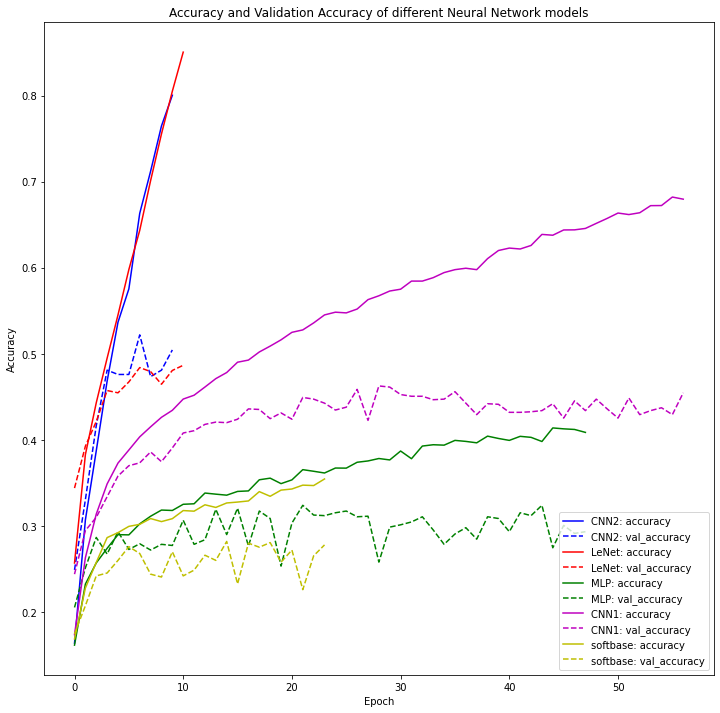

In [ ]:
def compare_models(history_lst, label_arr):
  fig = plt.figure(figsize=(12,12))
  plt.title("Accuracy and Validation Accuracy of different Neural Network models")
  i=0
  color_arr = ['b','r','g','m','y']
  for history in history_lst:
    plt.plot(history.history['accuracy'], label=label_arr[i]+': accuracy', color=color_arr[i%5])
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label = label_arr[i] + ': val_accuracy',color=color_arr[i%5])
    i+=1

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

compare_models([history_cnn21, history_lenet1, history_mlp1, history_cnn11, history_softbase1], ['CNN2', 'LeNet', 'MLP', 'CNN1', "softbase"])

Τα εν λόγω αποτελέσματα αναπαρίστανται και σε ξεχωριστές γραφικές παραστάσεις για κάθε μοντέλο.

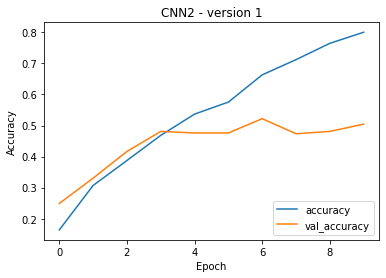

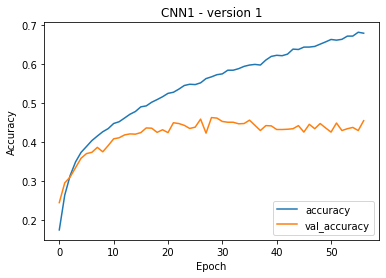

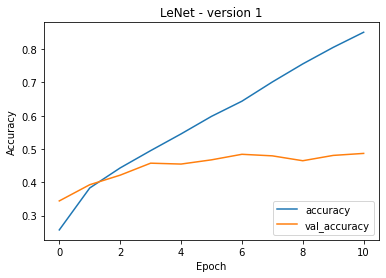

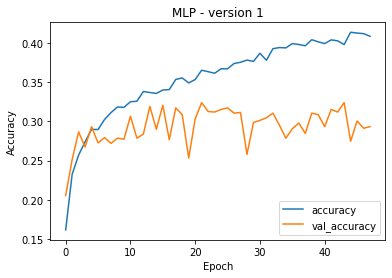

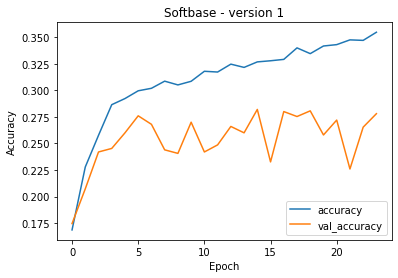

In [ ]:
acc_vs_valacc(history_cnn21, 'CNN2 - version 1')

acc_vs_valacc(history_cnn11, 'CNN1 - version 1')

acc_vs_valacc(history_lenet1, 'LeNet - version 1')

acc_vs_valacc(history_mlp1, 'MLP - version 1')

acc_vs_valacc(history_softbase1, 'Softbase - version 1')

2.3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:

 - **Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου:**  
 Παρατηρούμε πως όσο μεγαλύτερο υποσύνολο του CIFAR100 επιλέξουμε ως πρόβλημα, τόσο μικρότερη η απόδοση του μοντέλου αλλά και ο χρόνος που απαιτείται για την ολοκλήρωση της κάθε εποχής. Αυτό είναι αναμενόμενο, ο χρόνος αυξάνεται αφού σε κάθε εποχή θα πρέπει να εισαχθεί ως είσοδος στο μοντέλο μεγαλύτερο training set, και το accuracy μειώνεται αφού το πρόβλημα ταξινόμησης έχει περισσότερες κλάσεις και επομένως είναι πιο δύσκολο. Η αξιολόγηση ως προς την εν λόγω παράμετρο πραγματοποιήθηκε με χρήση της συνάρτησης που υλοποιεί την επιλογή του αριθμού των εξεταζόμενων κλάσεων. 

 - **Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer):**  
 Βάσει των δοκιμών μας παρατηρούμε πως ενώ ο Adam optimizer επιτυγχάνει πιο γρήγορα σύγκλιση σε πολλές περιπτώσεις, ο SGD optimizer επιτυγχάνει σύγκλιση σε μεγαλύτερα accuracies. Αυτό μπορεί να οφείλεται στο ότι προσαρμοστικές τεχνικές βελτιστοποίησης, όπως ο Adam, αποτυγχάνουν στο generalization. Όμως ο SGD είναι πιο πιθανό να συγκλίνει σε κάποιο τοπικό ελάχιστο και όχι στο ολικό. Επίσης πειραματιστήκαμε με τον Adagrad, ο οποίος τροποποιεί τον SGD επιτυγχάνοντας μεγαλύτερο robustness.
 
 - **Επίδραση του μεγέθους δέσμης (batch size):**
 Μεγαλύτερο batch size επιτυγχάνει, γενικά, αργότερη σύγκλιση σε υψηλά accuracies όμως πιο γρήγορη υπολογιστική ολοκλήρωση κάθε κύκλου εποχής. Γενικότερα μεγαλύτερο batch size επιτυγχάνει μικρότερο variance στο μοντέλο αφού κάθε φορά η ενημέρωση γίνεται βάσει πολλών εικόνων input. Όμως μικρότερο batch size, λόγω του λιγότερης ακρίβειας υπολογισμού του gradient μπορεί να προσδώσει έναν επιθυμητό θόρυβο και να κάνει το μοντέλο να ξεφύγει από τοπικά ακρότατα. Βέβαια υπερβολικά μικρό batch size ενδεχομένως να μην μας οδηγήσει ποτέ σε κάποιο global minimum. Η αξιολόγηση ως προς το εν λόγω μέγεθος πραγματοποιήθηκε με προσθήκη της παραμέτρου batch_size σαν όρισμα στην εντολή fit. Περαιτέρω εξειδίκευση ως προς την επίδραση του batch size πραγματοποιείται στο ακόλουθο ερώτημα, εφόσον στο συγκεκριμένο δεν ζητείται η εύρεση της βέλτιστης τιμής του. 

## Βήμα 3:  
Αξιολογήστε την ακρίβεια των μοντέλων για το test set σας.

###***Aπάντηση***:

Αρχικά, φορτώνουμε τις ιστορίες των μοντέλων που έχουν αποθηκευτεί από τα προηγούμενα βήματα. Αυτό γίνεται ώστε να μην είναι ανάγκη κάθε φορά που αλλάζουμε runtime στο collab, να πρέπει να επανεκπαιδεύσουμε απ'την αρχή, όλα τα μοντέλα. Στην συνέχεια, εφαρμόζουμε την ακόλουθη συνάρτηση για κάθε μία από τις δοθείσες αρχιτεκτονικές. 

In [ ]:
model_cnn11 =  tf.keras.models.load_model('cnn11.h5')

model_cnn21 =  tf.keras.models.load_model("cnn21.h5")

model_lenet1 =  tf.keras.models.load_model("lenet1.h5")

model_mlp1 =  tf.keras.models.load_model("mlp1.h5")

model_softbase1  = tf.keras.models.load_model("softbase1.h5")

Στην συνέχεια, γίνεται η αξιολόγηση των μοντέλων στο σύνολο δοκιμής.

In [ ]:
print("\x1b[31mCnn2 model-version 1\x1b[0m")
model_cnn21.evaluate(x_test, y_test)

print("\x1b[31mLenet model-version 1\x1b[0m")
model_lenet1.evaluate(x_test, y_test)

print("\x1b[31mCnn1 model-version 1\x1b[0m")
model_cnn11.evaluate(x_test, y_test)

print("\x1b[31mMlp model-version 1\x1b[0m")
model_mlp1.evaluate(x_test, y_test)

print("\x1b[31mSoftbase model-version 1\x1b[0m")
model_softbase1.evaluate(x_test, y_test)

Cnn2 model-version 1
63/63 [==============================] - 0s 7ms/step - loss: 2.5789 - accuracy: 0.5045
Lenet model-version 1
63/63 [==============================] - 0s 2ms/step - loss: 2.4943 - accuracy: 0.4825
Cnn1 model-version 1
63/63 [==============================] - 0s 2ms/step - loss: 2.3094 - accuracy: 0.4310
Mlp model-version 1
63/63 [==============================] - 0s 2ms/step - loss: 2.5734 - accuracy: 0.2990
Softbase model-version 1
63/63 [==============================] - 0s 2ms/step - loss: 2.5766 - accuracy: 0.2700


[2.5766005516052246, 0.27000001072883606]

Παρατηρούμε ότι το δικό μας μοντέλο (cnn2) παρουσιάζει την υψηλότερη ακρίβεια στο test set σε σύγκριση με τα υπόλοιπα μοντέλα, αποτέλεσμα το οποίο είναι και θεωρητικά αναμενόμενο εφόσον το εν λόγω μοντέλο αποτελείται από περισσότερα convolutional layers. Το γεγονός αυτό είναι σε συμβατό με τα ποσοστά ακρίβειας τα οποία επιτυγχάνονται κατά την διάρκεια εκπαίδευσης του εν λόγω μοντέλου, όπως εύκολα μπορεί κανείς να διαπιστώσει παρατηρώντας την εξέλιξη της προαναφερθείσας διαδικασίας και συγκρίνοντας με τις επιδόσεις των υπόλοιπων μοντέλων. Όσον αφορά τις άλλες αρχιτεκτονικές, βλέπουμε ότι υψηλότερο loss παρουσιάζεται στην περίπτωση του LeNet μοντέλου, ενώ το αντίστοιχο accuracy λαμβάνει σχετικά ικανοποιητική τιμή. Χειρότερη απόδοση παρουσιάζει το softbase μοντέλο, αποτέλεσμα επίσης αναμενόμενο εφόσον αποτελείται στην ουσία μόνο από δύο dense layers. 

Γενικότερα υψηλότερης πολυπλοκότητ;ας και μεγαλύτερου βάθους νευρωνικά δίκτυα μπορούν πιο εύκολα να ενσωματώσουν πληροφορία σχετική με το πρόβλημα σε σχέση με μικρότερα δίκτυα.



**Προσοχή** 

Για τα επόμενα ερωτήματα θα κρατήσετε το μοντέλο που αντιστοιχεί στον καλύτερο συνδυασμό ( optimizer, loss, metrics και epoch) από τα μοντέλα που εκπαιδεύσατε (και για τα 5 μοντέλα - όπως στο Ερώτημα 1, βήμα 2.2).

## Ερώτημα 2



### Βήμα 1: Έλεγχος υπερεκπαίδευσης

  **1.1.** Προτείνετε τεχνικές που θα χρησιμοποιήσετε για να αντιμετωπίσετε το πρόβλημα της υπερεκπαίδεσης και υλοποιήστε τις τεχνικές που προτείνετε για την εκπαίδευση του μοντέλου ώστε αυτό να γενικεύει καλύτερα.

Δοκιμάστε διάφορους τρόπους για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως:

- Πρόωρος τερματισμός (early stopping). Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε. [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)

- Dropout. Μια άλλη τεχνική για τη μείωση της υπερεκπαίδευσης είναι το Dropout. Είναι ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)

- Επαύξηση δεδομένων. Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. [Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)




###***Απάντηση:***

Στην συνέχεια υλοποιούμε ένα συνδυασμό των ανωτέρω τεχνικών για κάθε ένα από τα εξεταζόμενα μοντέλα ώστε να πετύχουμε όσο τον δυνατόν καλύτερο αποτέλεσμα ως προς το πρόβλημα του overfitting, του οποίου την ύπαρξη εύκολα μπορεί κανείς να διαπιστώσει παρατηρώντας τις τιμές που λαμβάνουν οι μετρικές loss και accuracy κατά την διαδικασία εκπαίδευσης που πραγματοποιείται στο προηγούμενο ερώτημα. Πιο συγκεκριμένα, το φαινόμενο αυτό εμφανίζεται όταν το accuracy στο train set αυξάνεται, ενώ στο validation set παραμένει σχετικά σταθερό. Αντίστοιχη περιγραφή και ερμηνεία μπορεί να γίνει και με βάση τις τιμές του loss. Ποιοτικά αυτό σημαίνει ότι το μοντέλο αδυνατεί να ανταποκριθεί ικανοποιητικά σε δεδομένα που δεν έχει δει, παρόλο που φαινομενικά παρουσιάζει υψηλότερη ακρίβεια στο σύνολο εκπαίδευσης. Οι προαναφερθείσες τεχνικές συνοψίζονται ακολούθως:

- **Early Stopping:** Πρόκειται για μια τεχνική, η οποία αξιοποιεί κάποια μορφή regularization και χρησιμοποιείται για την αποφυγή του overfitting κατά την εκπαίδευση ενός μοντέλου με χρήση κάποιας επαναληπτικής μεθόδου. Τέτοιων ειδών μέθοδοι πραγματοποιούν ενημέρωση των βαρών του δικτύου έτσι ώστε να βελτιώνεται η απόδοση του μοντέλου σε κάθε επανάληψη ως προς το σύνολο εκπαίδευσης. Ωστόσο αυτό συνεπάγεται και αύξηση του σφάλματος γενίκευσης. Η μέθοδος του Early Stopping καθορίζει σε πρακτικό επίπεδο έναν επαρκή αριθμό εποχών εκπαίδευσης, εφόσον η διαδικασία της εκπαίδευσης διακόπτεται όταν η απόδοση του μοντέλου σταματά να παρουσιάζει βελτίωση. 

- **Dropout:** Ο όρος dropout αναφέρεται στην αγνόηση ορισμένων δομικών μονάδων του προς εξέταση νευρωνικού δικτύου κατά την φάση του training, τα οποία επιλέγονται με τυχαίο τρόπο. Πρακτικά, η μέθοδος αυτή επιβάλλει στα βάρη των εν λόγω νευρώνων, που ανριστοιχούν στο layer στο οποίο εφαρμόζεται, μηδενική τιμή έτσι ώστε η ολική κατανομή των τιμών των βαρών του δικτύου να προσεγγίζει την κανονική, μειώντας με αυτό τον τρόπο το παρατηρούμενο overfitting. 

- **Data augmentation:** H μέθοδος αυτή παράγει νέα δεδομένα εκπαίδευσης, εφαρμόζοντας τυχαίους μεταχσηματισμούς στα ήδη υπάρχοντα, στοχεύοντας στο να εκπαιδευτεί το δίκτυο σε όσο το δυνατόν περισσότερες εικόνες, μερικές εκ των οποίων θα έχουν παραχθεί από τους μετασχηματισμούς, όμως θα εξακολουθούν να αντιστοιχούν στις ίδιες κλάσεις. Με αυτό τον τρόπο επιλύεται το πρόβλημα των μικρών συνόλων δεδομένων, που αποτελούνται από ανεπαρκή αριθμό παραδειγμάτων εκπαίδευσης και στα οποία παρουσιάζεται συχνά το φαινόμενο του overfitting, ενώ συγχρόνως βελτιώνεται η ικανότητα γενίκευσης του μοντέλου. 



In [ ]:
# data augmentation
y_train_categ = np_utils.to_categorical(y_train, num_classes)
y_test_categ = np_utils.to_categorical(y_test, num_classes)
y_val_categ = np_utils.to_categorical(y_val, num_classes)

# define a  data generator for train and validation set
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2)

# define a data generator for test set
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [ ]:
#adding dropouts in the definition of our models

model_softbase_aug = models.Sequential()
model_softbase_aug.add(layers.Flatten( input_shape=(32, 32, 3)))
model_softbase_aug.add(layers.Dense(200))
model_softbase_aug.add(layers.Dropout(0.05))
model_softbase_aug.add(layers.Dense(num_classes, activation='softmax'))
model_softbase_aug.add(layers.Dropout(0.05))
model_softbase_aug.summary()


model_mlp_aug = models.Sequential()
model_mlp_aug.add(layers.Flatten(input_shape=(32,32,3)))
model_mlp_aug.add(layers.Dense(512, activation='relu'))
model_mlp_aug.add(layers.Dropout(0.02))
model_mlp_aug.add(layers.Dense(200))
model_mlp_aug.add(layers.Dropout(0.05))
model_mlp_aug.add(layers.Dense(num_classes, activation='softmax'))
model_mlp_aug.add(layers.Dropout(0.1))
model_mlp_aug.summary()


model_lenet_aug = models.Sequential()
model_lenet_aug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_lenet_aug.add(layers.MaxPooling2D((3, 3)))
model_lenet_aug.add(layers.Conv2D(32,(3,3), activation='relu' ))
model_lenet_aug.add(layers.MaxPooling2D((2, 2)))
model_lenet_aug.add(layers.Flatten())
model_lenet_aug.add(layers.Dense(512, activation='relu'))
model_lenet_aug.add(layers.Dropout(0.1))
model_lenet_aug.add(layers.Dense(200))
model_lenet_aug.add(layers.Dropout(0.2))
model_lenet_aug.add(layers.Dense(num_classes, activation='softmax'))
model_lenet_aug.add(layers.Dropout(0.4))
model_lenet_aug.summary()


model_cnn1_aug = models.Sequential()
model_cnn1_aug.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_cnn1_aug.add(layers.MaxPooling2D((2, 2)))
model_cnn1_aug.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_cnn1_aug.add(layers.Dropout(0.05))
model_cnn1_aug.add(layers.MaxPooling2D((2, 2)))
model_cnn1_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn1_aug.add(layers.Dropout(0.05))
model_cnn1_aug.add(layers.Flatten())
model_cnn1_aug.add(layers.Dense(200))
model_cnn1_aug.add(layers.Dropout(0.1))
model_cnn1_aug.add(layers.Dense(num_classes, activation='softmax'))
model_cnn1_aug.add(layers.Dropout(0.2))
model_cnn1_aug.summary()



model_cnn2_aug = models.Sequential()
model_cnn2_aug.add(layers.Conv2D(128, (3,3), padding="same",input_shape=(32, 32, 3)))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.Conv2D(128, (3, 3), padding='same'))
model_cnn2_aug.add(layers.MaxPooling2D((2, 2)))
model_cnn2_aug.add(layers.Dropout(0.05))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.Conv2D(256, (3, 3), padding='same'))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.MaxPooling2D((2, 2)))
model_cnn2_aug.add(layers.Dropout(0.08))
model_cnn2_aug.add(layers.Conv2D(512, (3, 3), padding='same'))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.Conv2D(256, (3, 3)))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.MaxPooling2D((2, 2)))
model_cnn2_aug.add(layers.Dropout(0.12))
model_cnn2_aug.add(layers.Flatten())
model_cnn2_aug.add(layers.Dense(1024))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.Dropout(0.15))
model_cnn2_aug.add(layers.Dense(200))
model_cnn2_aug.add(tf.keras.layers.LeakyReLU())
model_cnn2_aug.add(layers.Dropout(0.18))
model_cnn2_aug.add(layers.Dense(num_classes, activation='softmax' ))
model_cnn2_aug.add(layers.Dropout(0.2))
model_cnn2_aug.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 200)               614600    
_________________________________________________________________
dropout_48 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 20)                4020      
_________________________________________________________________
dropout_49 (Dropout)         (None, 20)                0         
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
Layer (type)            

Έπειτα, εκπαιδεύουμε τα προαναφερθέντα μοντέλα αξιοποιώντας τις τεχνικές για το πρόβλημα της υπερεκπαίδευσης.

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

# define batch size
bs = 32

# fits the model on batches with real-time data augmentation
model_softbase_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_softbase_aug.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=50,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_softbase_aug.save('softbase_aug.h5')

Epoch 1/50
266/265 [==============================] - 5s 20ms/step - loss: 6.0866 - accuracy: 0.1524 - val_loss: 4.2446 - val_accuracy: 0.1700
Epoch 2/50
266/265 [==============================] - 5s 18ms/step - loss: 4.0062 - accuracy: 0.1916 - val_loss: 2.9533 - val_accuracy: 0.2267
Epoch 3/50
266/265 [==============================] - 5s 18ms/step - loss: 3.3819 - accuracy: 0.2214 - val_loss: 2.6675 - val_accuracy: 0.2347
Epoch 4/50
266/265 [==============================] - 5s 18ms/step - loss: 3.1807 - accuracy: 0.2356 - val_loss: 2.5239 - val_accuracy: 0.2653
Epoch 5/50
266/265 [==============================] - 5s 18ms/step - loss: 3.1966 - accuracy: 0.2498 - val_loss: 2.5655 - val_accuracy: 0.2613
Epoch 6/50
266/265 [==============================] - 5s 18ms/step - loss: 3.1475 - accuracy: 0.2465 - val_loss: 2.5218 - val_accuracy: 0.2620
Epoch 7/50
266/265 [==============================] - 5s 19ms/step - loss: 3.1668 - accuracy: 0.2475 - val_loss: 2.5938 - val_accuracy: 0.2480

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

# define batch size
bs = 32

# fits the model on batches with real-time data augmentation
model_mlp_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_mlp_aug.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=50,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_mlp_aug.save('mlp_aug.h5')

Epoch 1/50
266/265 [==============================] - 5s 19ms/step - loss: 6.7099 - accuracy: 0.1552 - val_loss: 4.3620 - val_accuracy: 0.1940
Epoch 2/50
266/265 [==============================] - 5s 19ms/step - loss: 4.6082 - accuracy: 0.2018 - val_loss: 3.1772 - val_accuracy: 0.2107
Epoch 3/50
266/265 [==============================] - 5s 18ms/step - loss: 4.1860 - accuracy: 0.2244 - val_loss: 2.6923 - val_accuracy: 0.2460
Epoch 4/50
266/265 [==============================] - 5s 18ms/step - loss: 3.9737 - accuracy: 0.2418 - val_loss: 2.7283 - val_accuracy: 0.2413
Epoch 5/50
266/265 [==============================] - 5s 18ms/step - loss: 3.8781 - accuracy: 0.2395 - val_loss: 2.6994 - val_accuracy: 0.2300
Epoch 6/50
266/265 [==============================] - 5s 19ms/step - loss: 3.8796 - accuracy: 0.2578 - val_loss: 2.5445 - val_accuracy: 0.2687
Epoch 7/50
266/265 [==============================] - 5s 18ms/step - loss: 3.8084 - accuracy: 0.2642 - val_loss: 2.4853 - val_accuracy: 0.2933

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

# define batch size
bs = 32

# fits the model on batches with real-time data augmentation
model_lenet_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_lenet_aug.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=50,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_lenet_aug.save('lenet_aug.h5')

Epoch 1/50
266/265 [==============================] - 5s 19ms/step - loss: 7.7590 - accuracy: 0.1602 - val_loss: 2.4278 - val_accuracy: 0.2693
Epoch 2/50
266/265 [==============================] - 6s 22ms/step - loss: 7.5331 - accuracy: 0.2309 - val_loss: 2.2652 - val_accuracy: 0.3213
Epoch 3/50
266/265 [==============================] - 5s 19ms/step - loss: 7.4372 - accuracy: 0.2521 - val_loss: 2.1496 - val_accuracy: 0.3667
Epoch 4/50
266/265 [==============================] - 5s 19ms/step - loss: 7.4645 - accuracy: 0.2691 - val_loss: 2.1421 - val_accuracy: 0.3560
Epoch 5/50
266/265 [==============================] - 5s 19ms/step - loss: 7.3273 - accuracy: 0.2774 - val_loss: 2.0101 - val_accuracy: 0.4033
Epoch 6/50
266/265 [==============================] - 5s 20ms/step - loss: 7.5500 - accuracy: 0.2807 - val_loss: 2.0187 - val_accuracy: 0.3740
Epoch 7/50
266/265 [==============================] - 5s 20ms/step - loss: 7.3451 - accuracy: 0.3013 - val_loss: 1.9947 - val_accuracy: 0.3873

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define batch size
bs = 32

# fits the model on batches with real-time data augmentation
model_cnn1_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn1_aug.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=50,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_cnn1_aug.save('cnn1_aug.h5')

Epoch 1/50
266/265 [==============================] - 5s 19ms/step - loss: 5.1456 - accuracy: 0.1867 - val_loss: 2.4954 - val_accuracy: 0.2633
Epoch 2/50
266/265 [==============================] - 5s 19ms/step - loss: 4.9150 - accuracy: 0.2609 - val_loss: 2.3738 - val_accuracy: 0.2847
Epoch 3/50
266/265 [==============================] - 5s 19ms/step - loss: 4.7490 - accuracy: 0.2898 - val_loss: 2.2952 - val_accuracy: 0.3153
Epoch 4/50
266/265 [==============================] - 5s 19ms/step - loss: 4.8030 - accuracy: 0.2960 - val_loss: 2.3111 - val_accuracy: 0.3047
Epoch 5/50
266/265 [==============================] - 5s 19ms/step - loss: 4.6997 - accuracy: 0.3147 - val_loss: 2.1370 - val_accuracy: 0.3513
Epoch 6/50
266/265 [==============================] - 5s 19ms/step - loss: 4.7375 - accuracy: 0.3228 - val_loss: 2.0900 - val_accuracy: 0.3767
Epoch 7/50
266/265 [==============================] - 5s 19ms/step - loss: 4.7794 - accuracy: 0.3335 - val_loss: 2.1328 - val_accuracy: 0.3573

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)

# define batch size
bs = 64
# fits the model on batches with real-time data augmentation
model_cnn2_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn2_aug.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=50,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_cnn2_aug.save('cnn2_aug.h5')

Epoch 1/50
133/132 [==============================] - 6s 45ms/step - loss: 5.2574 - accuracy: 0.1499 - val_loss: 2.4970 - val_accuracy: 0.2433
Epoch 2/50
133/132 [==============================] - 6s 44ms/step - loss: 5.1543 - accuracy: 0.2372 - val_loss: 2.2976 - val_accuracy: 0.3173
Epoch 3/50
133/132 [==============================] - 6s 45ms/step - loss: 4.8788 - accuracy: 0.2871 - val_loss: 2.1019 - val_accuracy: 0.3713
Epoch 4/50
133/132 [==============================] - 6s 45ms/step - loss: 4.6733 - accuracy: 0.3236 - val_loss: 2.0657 - val_accuracy: 0.3907
Epoch 5/50
133/132 [==============================] - 6s 44ms/step - loss: 4.6546 - accuracy: 0.3464 - val_loss: 1.9483 - val_accuracy: 0.4120
Epoch 6/50
133/132 [==============================] - 6s 45ms/step - loss: 4.6505 - accuracy: 0.3711 - val_loss: 1.9589 - val_accuracy: 0.4220
Epoch 7/50
133/132 [==============================] - 6s 44ms/step - loss: 4.6641 - accuracy: 0.3758 - val_loss: 1.8186 - val_accuracy: 0.4760

- Παρατηρούμε πως τα οφέλη των data augmentation και regularization (όπως dropout layers) τεχνικών είναι πιο αισθητά στις μεγάλες αρχιτεκτονικές όπου είναι πιο επιρρεπής στο overfitting. Συγκεκριμένα, βλέπουμε πως σε βαθιές αρχιτεκτονικές όπως το cnn2, οι οποίες όπως εξηγήσαμε είναι πιο επιρρεπείς στο overfitting, το validation accuracy αυξάνεται και συγκλίνει σε μεγαλύτερες τιμές (από 52,2% σε 62.13%). 
- Επίσης το Early Stopping είναι χρήσιμο προλαμβάνοντας τις περιπτώσεις overfitting, αφού πετυχαίνουμε καλά validation accuracies και το δίκτυο σταματά να εκπαιδεύεται προτού φτάσουμε σε μεγάλες τιμές accuracy.

### Βήμα 2
Αξιολογήστε την ακρίβεια για το validation και το test set σας.

###***Απάντηση:***

Αρχικά, φορτώνουμε τις ιστορίες των μοντέλων που έχουν αποθηκευτεί από τα προηγούμενα βήματα. Αυτό γίνεται ώστε να μην είναι ανάγκη κάθε φορά που αλλάζουμε runtime στο collab, να πρέπει να επανεκπαιδεύσουμε απ'την αρχή, όλα τα μοντέλα. Στην συνέχεια, εφαρμόζουμε την ακόλουθη συνάρτηση για κάθε μία από τις δοθείσες αρχιτεκτονικές. 

In [ ]:
model_cnn1_aug =  tf.keras.models.load_model('cnn1_aug.h5')

model_cnn2_aug =  tf.keras.models.load_model("cnn2_aug.h5")

model_lenet_aug =  tf.keras.models.load_model("lenet_aug.h5")

model_mlp_aug =  tf.keras.models.load_model("mlp_aug.h5")

model_softbase_aug  = tf.keras.models.load_model("softbase_aug.h5")

Στην συνέχεια γίνεται η αξιολόγηση των προαναφερθέντων μοντέλων.

In [ ]:
print("\x1b[31mSoftbase model\x1b[0m")
test_loss, test_accuracy = model_softbase_aug.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_softbase_aug.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Softbase model
47/47 [==============================] - 0s 2ms/step - loss: 2.7859 - accuracy: 0.1473
Test loss: 2.8125205039978027
Test accuracy: 0.14000000059604645
Validation loss: 2.785858154296875
Validation accuracy: 0.14733333885669708


In [ ]:
print("\x1b[31mMlp model\x1b[0m")
test_loss, test_accuracy = model_mlp_aug.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_mlp_aug.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Mlp model
47/47 [==============================] - 0s 2ms/step - loss: 2.8413 - accuracy: 0.1440
Test loss: 2.841906785964966
Test accuracy: 0.14399999380111694
Validation loss: 2.841315746307373
Validation accuracy: 0.14399999380111694


In [ ]:
print("\x1b[31mLenet model\x1b[0m")
test_loss, test_accuracy = model_lenet_aug.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_lenet_aug.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Lenet model
47/47 [==============================] - 0s 3ms/step - loss: 3.6322 - accuracy: 0.1047
Test loss: 3.6472768783569336
Test accuracy: 0.1054999977350235
Validation loss: 3.6321988105773926
Validation accuracy: 0.10466666519641876


In [ ]:
print("\x1b[31mCnn1 model\x1b[0m")
test_loss, test_accuracy = model_cnn1_aug.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_cnn1_aug.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Cnn1 model
47/47 [==============================] - 0s 2ms/step - loss: 3.8924 - accuracy: 0.0907
Test loss: 3.9087393283843994
Test accuracy: 0.07349999994039536
Validation loss: 3.8923676013946533
Validation accuracy: 0.09066666662693024


In [ ]:
print("\x1b[31mCnn2 model\x1b[0m")
test_loss, test_accuracy = model_cnn2_aug.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_cnn2_aug.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Cnn2 model
47/47 [==============================] - 0s 6ms/step - loss: 3.0675 - accuracy: 0.1880
Test loss: 3.103717803955078
Test accuracy: 0.1679999977350235
Validation loss: 3.067500352859497
Validation accuracy: 0.18799999356269836


Κάνουμε τις εξής παρατηρήσεις:
- **ΠΑΡΑΤΗΡΗΣΗ ***:  Το validation accuracy που υπολογίζει η evaluate ειναι μικρότερο από το validation accuracy που υπολογίζει η μέθοδος fit του κάθε μοντέλου στην τελευταία εποχή. Αυτό (βάσει και των  αντίστοιχων πολλαπλών threads σχετικών με το θέμα αυτό, που βρήκαμε, μετά από αναζήτηση στο διαδίκτυο, στα [keras-official-documentation-faq](https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss) , [αντίστοιχο github thread](https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss) οφείλεται στο γεγονός ότι το validation accuracy η `fit` μέθοδος κάθε μοντέλου το υπολογίζει ως το μέσο validation accuracy του μοντέλου σε κάθε batch μιας συγκεκριμένης εποχής, που προφανώς μεταβάλλεται από batch σε batch αφού μεταβάλλονται και τα βάρη του μοντέλου. Αντιθέτως, το validation accuracy που υπολογίζουμε μέσω της `evaluate` υπολογίζεται ως το accuracy του τελικού μοντέλου (δηλαδή αφού έχει τελειώσει το training της τελευταίας εποχής) σε όλο το dataset (και όχι όπως πριν σαν μέσος όρος των accuracies του μοντέλου σε κάθε batch). Επομένως, οι μέθοδοι αυτοί υπολογίζουν διαφορετικά πράγματα. Τα αποτελέσματα validation accuracy που παράγει η `fit` είναι χρήσιμα για να αξιολογήσουμε την εκπαίδευση του μοντέλου καθώς του εισάγονται περισσότερα δεδομένα. Τα αποτελέσματα validation accuracy που παράγει η `evaluate` είναι χρήσιμα για να αξιολογήσουμε τελικώς το μοντέλο σε όλο το test set. Ακόμη παρατηρούμε πως το training loss υπολογίζεται με τα Dropout layers ενεργά, ενώ όταν χρησιμοποιείται η `evaluate` προφανώς αυτά είναι παγωμένα. 
Σημειώνουμε πως βάσει του [keras-official-documentation-faq](https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss)
θα έπρεπε όταν χρησιμοποιούμε μόνο ένα batch ανά εποχή και το νευρωνικό δίκτυο δεν περιλαμβάνει batch normalization/ dropout layers το validation accuracy της fit και αυτό της evaluate να είναι ίδια, κάτι που όμως δεν επαληθεύεται στην πράξη και φαίνεται να είναι κάποιο bug στην υλοποίηση της tensorflow (δείτε και αντίστοιχα threads [1](https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss), [2](https://github.com/keras-team/keras/issues/10014?fbclid=IwAR1bh2hUlZhYSBhd0QlBOiHs2W3G7jvkg8UEcPspKAn7VW_v3Tv7NjdR_Wk))
- Το validation accuracy είναι ίσο ή (τις περισσότερες φορές) μεγαλύτερο από το training accuracy. Αυτό οφείλεται στα dropout layers που έχουμε εισάγει στα μοντέλα, τα οποία έχουν ως αποτέλεσμα την καλύτερη γενίκευση των μοντέλων και σε δεδομένα που δεν έχουν δει. Πιο συγκεκριμένα, ο υπολογισμός του validation accuracy γίνεται με απενεργοποιημένα τα dropout layers και επομένως παράγει πιο ομαλά και καλύτερα αποτελέσματα από αυτά στο training mode. Αντίστοιχη επίδραση θα υπήρχε αν είχαμε χρησιμοποιήσει κάποιο weight regularization.
-  Κατά την διάρκεια του training παρατηρήσαμε καλύτερα αποτελέσματα με την χρήση των μεθόδων του Ερωτήματος 2 από ότι χωρίς. Η βελτίωση αυτή όμως δεν επαληθεύεται από το evaluation με τα test data (για περαιτέρω εξήγηση δείτε την **Παρατήρηση ***).



## Ερώτημα 3

Εφαρμόστε transfer learning για το δικό σας μοντέλο (CNN2), που αξιολογήσατε ως καλύτερο προς την ακρίβειά, στην αντιμετώπιση της υπερεκπαίδεσης. (Το καλύτερο μοντέλο που προέκυψε από το βήμα 2 του ερωτήματος 2). Για το transfer learning επιλέξτε, ένα από τα διαθέσιμα μοντέλα για μεταφορά μάθησης. 

###***Απάντηση:***

Transfer Learning είναι μια τεχνική μέσω της οποίας χρησιμοποιούμε προεκπαιδευμένα μοντέλα που επιλύουν ένα πρόβλημα για την επίλυση ενός άλλου προβλήματος. Στην περίπτωση των προβλημάτων ταξινόμησης χρησιμοποιούμε προεκπαιδευμένα μοντέλα ως feauture extractors στην έξοδο των οποίων προσθέτουμε μία κεφαλή ταξινόμησης. Στην περίπτωση που τα προβλήματα είναι παρεμφερή (π.χ. ταξινόμηση ζώων-ταξινόμηση πτηνών) χρειάζεται να εκπαιεδευτεί μικρότερο μέρος του δικτύου και επομένως το feauture extractor κομμάτι του δεν μεταβάλλεται κατά την εκπαίδευση.

Το transfer learning είναι ιδιαίτερα χρήσιμο, διότι με την βοήθεια του μπορούμε να επιτύχουμε καλά αποτελέσματα σε λίγο χρόνο και λίγους υπολογιστικούς πόρους (συγκριτικά με την εκπαίδευση ολόκληρου του δικτύου από την αρχή), αξιοποιώντας προεκπαιδευμένα δίκτυα. 

Στην εν λόγω περίπτωση γίνεται χρήση του Resnet(2015-version 2), ενός συνελικτικού δικτύου μεγάλου βάθους, το οποίο έχει ενσωματώσει batch normalization layers και είναι προεκπαιδευμένο στο imagenet, οπότε κατά συνέπεια τα προβλήματα ταξινόμησης είναι παρεμφερή. 

###Βήμα 1
"Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).

In [ ]:
#get the pre-trained model
pre_model = tf.keras.applications.ResNet152V2(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=max, classes=num_classes
)
pre_model.trainable=False

234553344/234545216 [==============================] - 3s 0us/step


In [ ]:
# Make full sequential model using pre-trained model and CNN2
model_transf = models.Sequential([
    pre_model
])
model_transf.add(layers.Flatten()),
model_transf.add(layers.Dense(1024)),
model_transf.add(tf.keras.layers.LeakyReLU()),
model_transf.add(layers.Dropout(0.15)),
model_transf.add(layers.Dense(200))
model_transf.add(tf.keras.layers.LeakyReLU())
model_transf.add(layers.Dropout(0.18))
model_transf.add(layers.Dense(num_classes, activation='softmax'))
model_transf.add(layers.Dropout(0.2))
model_transf.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Model)          (None, 1, 1, 2048)        58331648  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               205000    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 200)              

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define batch size
bs = 32

# fits the model on batches with real-time data augmentation
model_transf.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_transf.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=20,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_transf.save('transf.h5')

Epoch 1/20
266/265 [==============================] - 11s 42ms/step - loss: 5.2815 - accuracy: 0.1944 - val_loss: 2.5833 - val_accuracy: 0.2567
Epoch 2/20
266/265 [==============================] - 8s 30ms/step - loss: 5.1088 - accuracy: 0.2389 - val_loss: 2.5026 - val_accuracy: 0.2673
Epoch 3/20
266/265 [==============================] - 8s 29ms/step - loss: 4.9026 - accuracy: 0.2560 - val_loss: 2.4942 - val_accuracy: 0.2587
Epoch 4/20
266/265 [==============================] - 8s 30ms/step - loss: 5.0829 - accuracy: 0.2532 - val_loss: 2.4133 - val_accuracy: 0.2767
Epoch 5/20
266/265 [==============================] - 8s 30ms/step - loss: 4.9990 - accuracy: 0.2698 - val_loss: 2.4366 - val_accuracy: 0.2720
Epoch 6/20
266/265 [==============================] - 8s 30ms/step - loss: 4.8212 - accuracy: 0.2833 - val_loss: 2.4433 - val_accuracy: 0.2887
Epoch 7/20
266/265 [==============================] - 8s 30ms/step - loss: 4.9401 - accuracy: 0.2779 - val_loss: 2.5052 - val_accuracy: 0.265

Παρατηρούμε γρήγορη σύγκλιση στο αποτέλεσμα, το οποίο είναι αναμενόμενο εφόσον χρησιμοποιούμε προεκαπιδευμένο μοντέλο. Μάλιστα, δεδομένου του μεγέθους του δικτύου (~12 φορές μεγαλύτερο από το cnn2), η εκπαίδευση γίνεται επαρκώς γρήγορα εφόσον δεν εκπαιδεύονται τα layers της συνελικτικής βάσης.   

### Βήμα 2
  Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

In [ ]:
#Make full sequential model using pre-trained model and CNN2
model_transf_v2 = models.Sequential([
    pre_model
])
model_transf_v2.add(layers.Flatten()),
model_transf_v2.add(layers.Dense(1024)),
model_transf_v2.add(tf.keras.layers.LeakyReLU()),
model_transf_v2.add(layers.Dropout(0.15)),
model_transf_v2.add(layers.Dense(200, trainable=False))
model_transf_v2.add(tf.keras.layers.LeakyReLU())
model_transf_v2.add(layers.Dropout(0.18))
model_transf_v2.add(layers.Dense(num_classes, activation='softmax'))
model_transf_v2.add(layers.Dropout(0.2))
model_transf_v2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Model)          (None, 1, 1, 2048)        58331648  
_________________________________________________________________
flatten_14 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 200)               205000    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 200)             

In [ ]:
# use pretrained weights from portion of cnn2 classification layers  
weights = model_cnn2_aug.layers[-5].get_weights()  
model_transf_v2.layers[5].set_weights(weights)

In [ ]:
#define early stopping after 4 consecutive epochs with increasing loss  
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define batch size
bs = 32

# fits the model on batches with real-time data augmentation
model_transf_v2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_transf_v2.fit(datagen.flow(x_train, y_train_categ, batch_size=bs),
                    steps_per_epoch=len(x_train)/bs, epochs=20,
                     validation_data=datagen.flow(x_val, y_val_categ, batch_size=bs),
                    validation_steps = len(x_val)/bs, callbacks=callback)

model_transf_v2.save('transf_v2.h5')

Epoch 1/20
266/265 [==============================] - 11s 40ms/step - loss: 5.2535 - accuracy: 0.1893 - val_loss: 2.5127 - val_accuracy: 0.2640
Epoch 2/20
266/265 [==============================] - 8s 30ms/step - loss: 4.9383 - accuracy: 0.2418 - val_loss: 2.4504 - val_accuracy: 0.2780
Epoch 3/20
266/265 [==============================] - 8s 30ms/step - loss: 5.0089 - accuracy: 0.2622 - val_loss: 2.4028 - val_accuracy: 0.2767
Epoch 4/20
266/265 [==============================] - 8s 31ms/step - loss: 4.8976 - accuracy: 0.2784 - val_loss: 2.3917 - val_accuracy: 0.2973
Epoch 5/20
266/265 [==============================] - 8s 31ms/step - loss: 4.8085 - accuracy: 0.2880 - val_loss: 2.3627 - val_accuracy: 0.2980
Epoch 6/20
266/265 [==============================] - 8s 30ms/step - loss: 4.9433 - accuracy: 0.2864 - val_loss: 2.3640 - val_accuracy: 0.3067
Epoch 7/20
266/265 [==============================] - 8s 30ms/step - loss: 5.0165 - accuracy: 0.2838 - val_loss: 2.3853 - val_accuracy: 0.304

Συγκριτικά με το Βήμα 1 παρατηρούμε πιο γρήγορη σύγκλιση και ελάχιστα καλύτερα αποτελέσματα. Αυτό συμβαίνει διότι πρακτικά εκπαιδεύεται μόνο το τελικό layer ταξινόμησης, το οποίο στην ουσία διεξάγει την κατηγοριοποίηση στον ζητούμενο αριθμό κλάσεων, ενώ συγχρόνως γίνεται χρήση των πρότερα υπολογισμένων βαρών για το dense layer, γεγονός το οποίο φαίνεται να επιδρά θετικά. Ωστόσο, το θεωρητικά αναμενόμενο αποτέλεσμα θα ήταν κάποια πτώση στην παρατηρούμενη ακριβεία, εφόσον εκπαιδεύται μικρότερο τμήμα του δικτύου. Επομένως, μπορεί κανείς να διαπιστώσει την μεγάλη επίδραση στο τελικό αποτέλεσμα που ασκούν τα dropout layers και κυρίως η τυχαιότητα με την οποία μηδενίζουν ποσοστό των νευρώνων στο εκάστοτε εφαρμοζόμενο layer. 

### Βήμα 3 
Αξιολογήστε τα αποτελέσματά σας, βάσει της ακρίβειας του validation set και του test set σας, για τα προηγούμενα βήματα του Ερωτήματος 3 

In [ ]:
print("\x1b[31mTranfer Learning model-step 1\x1b[0m")
test_loss, test_accuracy = model_transf.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_transf.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Tranfer Learning model-step 1
47/47 [==============================] - 1s 22ms/step - loss: 2.9832 - accuracy: 0.1400
Test loss: 2.9994654655456543
Test accuracy: 0.14000000059604645
Validation loss: 2.983194589614868
Validation accuracy: 0.14000000059604645


In [ ]:
print("\x1b[31mTranfer Learning model-step 2\x1b[0m")
test_loss, test_accuracy = model_transf_v2.evaluate(x_test, y_test_categ)
validation_loss, validation_accuracy = model_transf_v2.evaluate(x_val, y_val_categ)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Tranfer Learning model-step 2
47/47 [==============================] - 1s 22ms/step - loss: 2.9023 - accuracy: 0.1513
Test loss: 2.9078524112701416
Test accuracy: 0.15449999272823334
Validation loss: 2.9022977352142334
Validation accuracy: 0.15133333206176758


Παρατηρούμε ότι και για το test accuracy ισχύει ότι ισχύει και για το validation accuracy, συγκριτικά για το Βήμα 1 και 2. Ακόμη παρατηρούμε διαφοροποίηση ως προς το validation accuracy που υπολογίζει η fit σε σχέση με αυτό που υπολογίζει η evaluate (για περισσότερες λεπτομέρειες δείτε την **ΠΑΡΑΤΗΡΗΣΗ ***)